In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
Insurance=pd.read_csv('insurance.csv')

In [4]:
Insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
Insurance['new_sex'] = le.fit_transform(Insurance['sex'])

In [8]:
Insurance['new_smoker'] = le.fit_transform(Insurance['smoker'])

In [9]:
Insurance['new_region'] = le.fit_transform(Insurance['region'])

In [10]:
Insurance

,age,sex,bmi,children,smoker,region,charges,new_sex,new_smoker,new_region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [ ]:
#Eliminate outlier

In [16]:
lowerLimit = Insurance['bmi'].quantile(0.00)
upperLimit = Insurance['bmi'].quantile(0.87)
lowerLimit

15.96

In [17]:
upperLimit

37.44520000000001

In [18]:
Insurance['bmi'] = Insurance['bmi'].clip(lowerLimit, upperLimit)

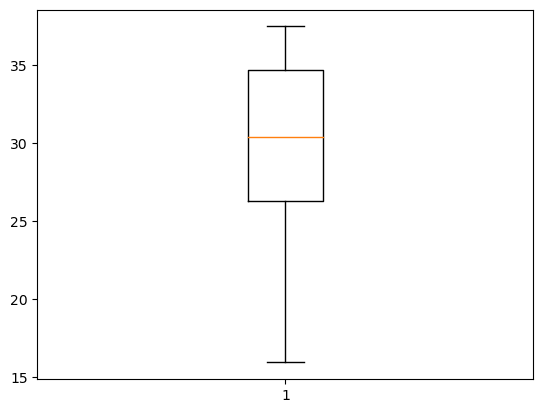

In [19]:
plt.boxplot(Insurance.bmi)
plt.show()

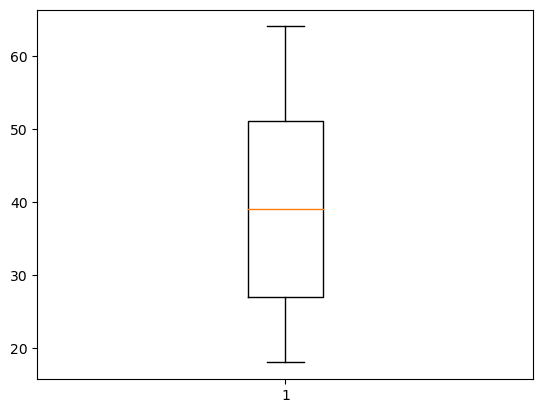

In [20]:
plt.boxplot(Insurance.age)
plt.show()

In [21]:
Insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'new_sex', 'new_smoker', 'new_region'],
      dtype='object')

In [22]:
X=Insurance[['age', 'bmi', 'children',
       'new_sex', 'new_smoker', 'new_region']]

In [23]:
Y= Insurance['charges']

In [24]:
#spliting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2)

In [27]:
reglin = LinearRegression()

In [28]:
#Train the model
reglin.fit(X_train,Y_train)

LinearRegression()

In [31]:
y_pred = reglin.predict(X_test)

In [32]:
y_pred

array([-2956.62094814,  5588.54798959,  6763.05394349,  3161.52609192,
        7726.93840177,  3589.38607559, 37561.37997849, 15166.26199914,
       13326.37955216, 10791.38554824, 13615.30516843, -1645.86827618,
       35352.74155373,  7171.80086908,  5837.9934355 ,  1241.69019858,
       10997.38816865, 10619.3952668 , 14115.75752993, 31921.53428405,
        6903.53337775,  1408.98113522, 10529.48255344,  7878.60380622,
       28833.49990872,  2746.37660931, 15012.69071682,  7503.76368166,
       32277.18392809, 14856.91821858, 11756.03605131,  6847.93995759,
        6501.31335823, 12797.91422131, 27923.44625381,  5006.30473218,
        5713.42852136,  8067.3285442 ,  7576.39465355,  6163.79630994,
       12060.61993978, 27892.92982562,  6555.53903372,  6253.46994194,
       33619.59311525,  3101.40943923, 36793.23262284,  3731.48528797,
        8995.31089531,  2303.44789386,  1851.64636895,  9788.34817337,
       12906.47967031, 33326.28486092, 11105.1343155 , 12504.53323052,
      

# Model Evaluation

In [34]:
#As usual, we start by importing the GridSearchCV class like this below

from sklearn.model_selection import GridSearchCV

In [58]:
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_log_error') 
